In [1]:
import logging
import warnings
import pet
import glob

# Configure the logger
logging.basicConfig(level=logging.ERROR, filename='error_log\error.log',
                    format='%(asctime)s - %(message)s')

# Ignore warnings
warnings.filterwarnings("ignore")

#raw_las_folder = r'wfmp_raw_las/'
raw_las_folder = r'raw_las/'
las_files = glob.glob(raw_las_folder + r'*.las')

processed_logs = []

for las_file in las_files:
    try:
        log = pet.Log(las_file)

        # comment out transformation not needed
        # try:
        #     log.precondition()
        # except Exception as e1:
        #     #print(f"An error occurred while precondition {las_file}: {str(e1)}")
        #     logging.error(f"An error occurred while precondition {las_file}: {str(e1)}")
        log.precondition()

        # try:
        #     log.despike_lfilter(n=15)
        # except Exception as e1:
        #     print(f"An error occurred while despiking {las_file}: {str(e1)}")
        #     logging.error(f"An error occurred while despiking {las_file}: {str(e1)}")

        # try:
        #     log.fluid_properties()
        # except Exception as e2:
        #     print(f"An error occurred while computing fluid properties for {las_file}: {str(e2)}")
        #     logging.error(f"An error occurred while computing fluid properties for {las_file}: {str(e2)}")

        # try:
        #     log.multimineral_model()
        # except Exception as e3:
        #     print(f"An error occurred while computing multimineral model for {las_file}: {str(e3)}")
        #     logging.error(f"An error occurred while computing multimineral model for {las_file}: {str(e3)}")
        
        processed_logs.append(log)

        # Get the well name from the log object
        well_name = log.well['UWI'].value.replace('.', '')

        # Create the new filename
        edited_las_file = f'edited_las/{well_name}_edited.las'

        # Write the processed log to the new filename
        log.write(edited_las_file)
    except Exception as e:
        print(f"An error occurred while processing {las_file}: {str(e)}")
        logging.error(f"An error occurred while processing {las_file}: {str(e)}")
        continue

An error occurred while processing raw_las\42301314550000_GILLS 9_2.las: [Errno 22] Invalid argument: 'edited_las/42301314550000_edited.las'


# Code to print Despiked curves

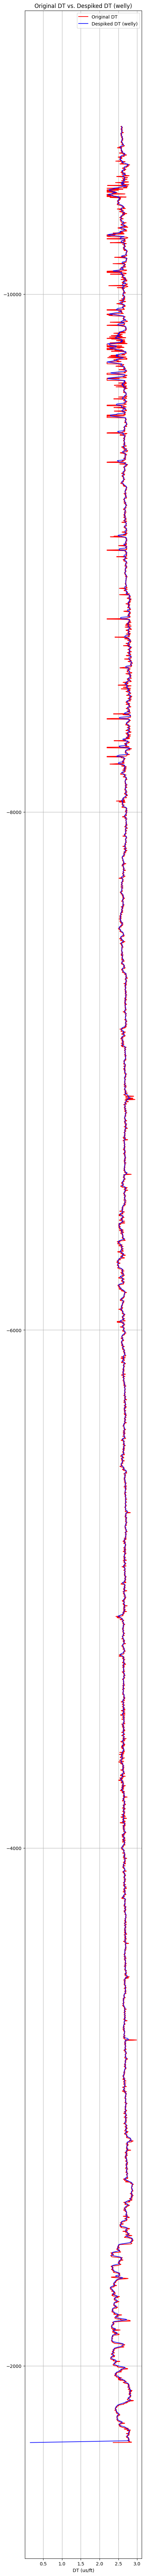

In [3]:
import lasio
las = lasio.read('edited_las/30015313380000_edited.las')
depth = las['DEPT']
dt_curve = las['RHOB:1']
despiked_dt = las['RHOB:2']
import matplotlib.pyplot as plt

# Plot the original and despiked DT curves side by side
plt.figure(figsize=(10, 100))

# Plot original DT curve and despiked DT curve from welly
plt.subplot(1, 2, 1)
plt.plot(dt_curve, -depth, '-', color='red', label='Original DT')
plt.plot(despiked_dt, -depth, '-', color='b', label='Despiked DT (LFILTER)', alpha=0.9)
plt.title('Original DT vs. Despiked DT (LFILTER)')
plt.xlabel('DT (us/ft)')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()